In [97]:
# Importing the usefull libraries

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

import sys
sys.path.insert(1, "../scripts")
from ml_processors import ML_Processor as MLP

mlp = MLP()


In [98]:
# Reading and assigning a variable to the respective datasets

cm_data =  pd.read_csv('../data/chrome_data.csv')
cm_w_data =  pd.read_csv('../data/chrome_mobile_webview_data.csv')
fb_data =  pd.read_csv('../data/facebook_data.csv')
pl_5_data =  pd.read_csv('../data/platform_5.csv')
pl_6_data =  pd.read_csv('../data/platform_6.csv')


In [99]:
# Cleaning the data to drop the redendent columns

columns_to_be_dropped = ['no','SAID_YES']
cm_data_clean = cm_data.drop(columns_to_be_dropped,axis=1)
cm_w_data_clean = cm_w_data.drop(columns_to_be_dropped,axis=1)
fb_data_clean = fb_data.drop(columns_to_be_dropped,axis=1)
pl_5_data_clean =pl_5_data.drop(columns_to_be_dropped[0],axis=1)
pl_6_data_clean = pl_6_data.drop(columns_to_be_dropped[0],axis=1)


In [100]:
# Identifying the catagorical and numerical columns

cat, num = mlp.sep_cat_num(cm_data_clean)
print("Numerical Columns:", cat)
print("****************")
print("Categorical Columns:", num)

Numerical Columns: ['auction_id', 'experiment', 'date', 'device_make', 'browser']
****************
Categorical Columns: ['hour', 'yes']


In [101]:
# Describing the catagorical variables 

cm_data_clean[cat].describe()

,auction_id,experiment,date,device_make,browser
count,695,695,695,695,695
unique,695,2,8,14,1
top,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-03,Generic Smartphone,Chrome Mobile
freq,1,371,176,665,695


In [102]:
# Using pipeline for the Machine learning
pipe_1 = Pipeline(
    steps=[
        ("label categories", FunctionTransformer(mlp.cat_labeler, kw_args={"cat_cols": cat})),
        ("scale data", FunctionTransformer(mlp.scaler)),
        ("separate target and features", FunctionTransformer(mlp.target_feature, kw_args={"f_r": [0, 6], "t":-1})),
        ("divide dataset", FunctionTransformer(mlp.set_splitter, kw_args={"test": 0.1, "val":0.2, "rand_state":8})),      
        ])
chrome_set = pipe_1.fit_transform(cm_data_clean)
chrome_mobile_set = pipe_1.fit_transform(cm_w_data_clean)
facebook_set = pipe_1.fit_transform(fb_data_clean)
platform_5_set = pipe_1.fit_transform(pl_5_data_clean)
platform_6_set = pipe_1.fit_transform(pl_6_data_clean)

cat_labeler output...

   auction_id  experiment  date  hour  device_make  browser  yes
0           0           1     1    16            1        0    1
1           1           1     3     8            1        0    0


scaler output... 

   auction_id  experiment      date      hour  device_make  browser  yes
0    0.000000         1.0  0.142857  0.695652     0.076923      0.0  1.0
1    0.001441         1.0  0.428571  0.347826     0.076923      0.0  0.0


target_features output... 

features size: (695, 6)


set_splitter output... 

X_train shape: (512, 6)
y_train shape: (512,)
x_test shape: (70, 6)
y_test shape: (70,)
X_val shape: (113, 6)
y_val shape: (113,)
cat_labeler output...

   auction_id  experiment  date  hour  device_make  browser  yes
0           0           1     2     2            3        0    0
1           1           1     2     6           11        0    0


scaler output... 

   auction_id  experiment      date      hour  device_make  browser  yes
0    0.000000      

In [103]:
# Creating a ML pipeline for all the datasets

pipe_chrome =Pipeline([('scalar1',StandardScaler()),('lr_classifier',LogisticRegression(random_state=2))])
pipe_chrome_webview =Pipeline([('scalar1',StandardScaler()),('lr_classifier',LogisticRegression(random_state=2))])
pipe_facebook =Pipeline([('scalar1',StandardScaler()),('lr_classifier',LogisticRegression(random_state=2))])
pipe_pl_5 =Pipeline([('scalar1',StandardScaler()),('lr_classifier',LogisticRegression(random_state=2))])
pipe_pl_6 =Pipeline([('scalar1',StandardScaler()),('lr_classifier',LogisticRegression(random_state=2))])

In [104]:
# Finding and printing accuracy score of the Logistic regression for the chrome dataset

chrome_model = pipe_chrome.fit(chrome_mobile_set[0], chrome_mobile_set[1])
result = pipe_chrome.score(chrome_mobile_set[4],chrome_mobile_set[5])

print(f'The accuracy we get using the chrome mobile webview data is: {result}')

The accuracy we get using the chrome mobile webview data is: 0.4864864864864865


In [105]:
# Finding and printing accuracy score of the Logistic regression for the chrome mobile view dataset


pipe_chrome_webview.fit(chrome_set[0], chrome_set[1])
result = pipe_chrome_webview.score(chrome_set[4],chrome_set[5])

print(f'The accuracy we get using the chrome mobile data is: {result}')

The accuracy we get using the chrome mobile data is: 0.5663716814159292


In [106]:
# Finding and printing accuracy score of the Logistic regression for the facebook dataset


pipe_facebook.fit(facebook_set[0], facebook_set[1])
result = pipe_facebook.score(facebook_set[4],facebook_set[5])

print(f'The accuracy we get using the facebook data is: {result}')

The accuracy we get using the facebook data is: 0.46153846153846156


In [107]:
# Finding and printing accuracy score of the Logistic regression for the platform 5 dataset


pipe_pl_5.fit(platform_5_set[0], platform_5_set[1])
result = pipe_pl_5.score(platform_5_set[4],platform_5_set[5])

print(f'The accuracy we get using the platform 5 data is: {result}')

The accuracy we get using the platform 5 data is: 0.3333333333333333


In [108]:
# Finding and printing accuracy score of the Logistic regression for the platform 6 dataset

pipe_pl_6.fit(platform_6_set[0], platform_6_set[1])
result = pipe_pl_6.score(platform_6_set[4],platform_6_set[5])

print(f'The accuracy we get using the platform 6 data is: {result}')

The accuracy we get using the platform 6 data is: 0.5125628140703518


In [110]:
# Defining a simple function that will find our variable names

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [111]:
# Putting the datasets in to a list for simpler access

clean_data_list = [cm_data_clean,cm_w_data_clean,fb_data_clean,pl_5_data_clean,pl_6_data_clean]

In [114]:
# Validating using KFold of 5

model=LogisticRegression()
kfold_validation=KFold(5)

In [115]:
# Looping through all the dataset and find the accuracy aswell as the loss function by using cross validation

for clean_data in clean_data_list:
  X = clean_data.iloc[:,:6]
  y = clean_data.iloc[:,-1]
  results=cross_val_score(model,X,y,cv=kfold_validation)
  name = namestr(clean_data,globals())
  print(f'Result of {name[0]}\n')
  print(results)
  print(np.mean(results),'\n')
  print('#################################')
  print('\n')

Result of cm_data_clean

[0.53956835 0.5323741  0.55395683 0.50359712 0.56834532]
0.539568345323741 

#################################


Result of cm_w_data_clean

[0.5        0.43478261 0.57777778 0.44444444 0.51111111]
0.4936231884057971 

#################################


Result of fb_data_clean

[0.5        0.58064516 0.41935484 0.41935484 0.5483871 ]
0.4935483870967742 

#################################


Result of pl_5_data_clean

[0.75       0.75       0.66666667 1.         0.33333333]
0.7 

#################################


Result of pl_6_data_clean

[0.52845528 0.52653061 0.51836735 0.53061224 0.52653061]
0.5260992201758753 

#################################




##### From the above k_fold validation we can see that the maximum accuracy we can get by using 5 fold and logistic regression is 0.75 from all the datasets. From this we can infer that either the data is not enough or the model is not suitable since the accuracy is less than 80%

In [116]:
# Splitting the data for feature importance analysis

X_cm = cm_data_clean.iloc[:,:6]
y_cm = cm_data_clean.iloc[:,-1]
x_main,x_test,y_main,y_test = train_test_split(X_cm,y_cm,test_size=0.1)
x_train,x_valid,y_train,y_valid = train_test_split(x_main,y_main,test_size=0.22)

In [118]:
# Modeling the chrome data and finding the accuracy

model_cm = LogisticRegression()
model_cm.fit(x_train,y_train)
model_cm.score(x_valid,y_valid)

0.5434782608695652

In [120]:
# Finding the intercept of our regression model

model_cm.intercept_

array([-0.58442904])

In [122]:
# Findig the coeficient lists of our model

coefitients_cm = model_cm.coef_

In [123]:
# Creating a features dataframe to see the importance

features = ['auction_id','experiment','date','hour','device_make','browser']
feature_importance_cm_df = pd.DataFrame(features,columns=['Feature'])

In [124]:
# Creating a new column for the feature importance

feature_importance_cm_df['Feature\'s importance'] = pow(math.e,np.array(coefitients_cm[0]))
feature_importance_cm_df.head()

,Feature,Feature's importance
0,auction_id,1.191390
1,experiment,1.097778
2,date,0.989286
3,hour,1.614484
4,device_make,1.193343


In [125]:
# Sorting the table by the feature importance metrics

feature_importance_cm_df = feature_importance_cm_df.sort_values(by="Feature's importance")
feature_importance_cm_df

,Feature,Feature's importance
2,date,0.989286
5,browser,1.000000
1,experiment,1.097778
0,auction_id,1.191390
4,device_make,1.193343
3,hour,1.614484


Text(0.5, 1.0, 'Feature importance for the chrome dataset')

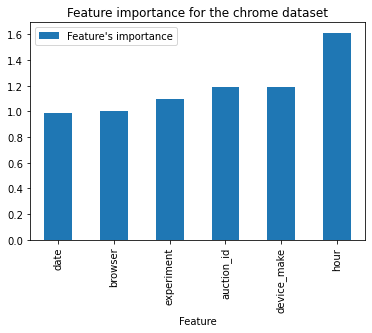

In [127]:
# Ploting the feature importance graph for the chrome data

feature_importance_cm_df.plot.bar(x='Feature', y="Feature's importance", rot=90)
plt.title('Feature importance for the chrome dataset')

Text(0.5, 1.0, 'Feature importance for the chrome mobile webview dataset')

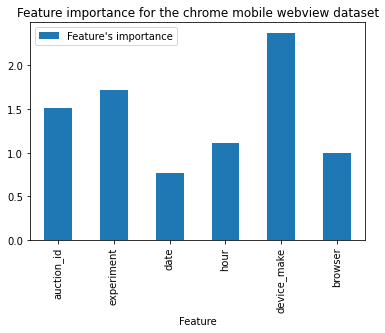

In [128]:
# Ploting the feature importance graph for the chrome mobile view data

X_cm_w = cm_w_data_clean.iloc[:,:6]
y_cm_w = cm_w_data_clean.iloc[:,-1]
x_main,x_test,y_main,y_test = train_test_split(X_cm_w,y_cm_w,test_size=0.1)
x_train,x_valid,y_train,y_valid = train_test_split(x_main,y_main,test_size=0.22)
model_cm_w = LogisticRegression()
model_cm_w.fit(x_train,y_train)
model_cm_w.score(x_valid,y_valid)
coefitients_cm_w = model_cm_w.coef_
feature_importance_cm_w_df = pd.DataFrame(features,columns=['Feature'])
feature_importance_cm_w_df['Feature\'s importance'] = pow(math.e,np.array(coefitients_cm_w[0]))
feature_importance_cm_w_df.plot.bar(x='Feature', y="Feature's importance", rot=90)
plt.title('Feature importance for the chrome mobile webview dataset')

Text(0.5, 1.0, 'Feature importance for the facebook dataset')

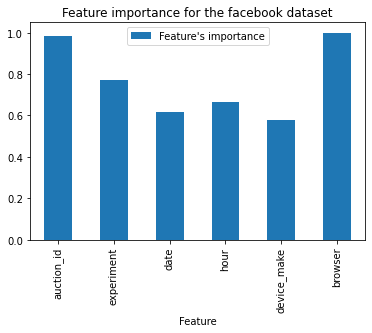

In [129]:
# Ploting the feature importance graph for the facebook data

X_fb = fb_data_clean.iloc[:,:6]
y_fb = fb_data_clean.iloc[:,-1]
x_main,x_test,y_main,y_test = train_test_split(X_fb,y_fb,test_size=0.1)
x_train,x_valid,y_train,y_valid = train_test_split(x_main,y_main,test_size=0.22)
model_fb = LogisticRegression()
model_fb.fit(x_train,y_train)
model_fb.score(x_valid,y_valid)
coefitients_fb = model_fb.coef_
feature_importance_fb_df = pd.DataFrame(features,columns=['Feature'])
feature_importance_fb_df['Feature\'s importance'] = pow(math.e,np.array(coefitients_fb[0]))
feature_importance_fb_df.plot.bar(x='Feature', y="Feature's importance", rot=90)
plt.title('Feature importance for the facebook dataset')

Text(0.5, 1.0, 'Feature importance for the platform 5 dataset')

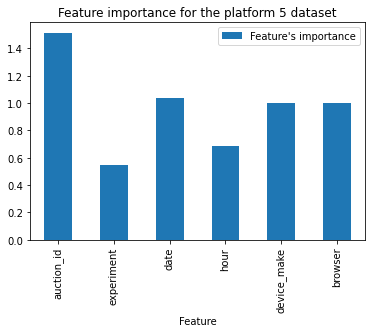

In [130]:
# Ploting the feature importance graph for the platform 5 data

X_pl_5 = pl_5_data_clean.iloc[:,:6]
y_pl_5 = pl_5_data_clean.iloc[:,-1]
x_main,x_test,y_main,y_test = train_test_split(X_pl_5,y_pl_5,test_size=0.1)
x_train,x_valid,y_train,y_valid = train_test_split(x_main,y_main,test_size=0.22)
model_pl_5 = LogisticRegression()
model_pl_5.fit(x_train,y_train)
model_pl_5.score(x_valid,y_valid)
coefitients_pl_5 = model_pl_5.coef_
feature_importance_pl_5_df = pd.DataFrame(features,columns=['Feature'])
feature_importance_pl_5_df['Feature\'s importance'] = pow(math.e,np.array(coefitients_pl_5[0]))
feature_importance_pl_5_df.plot.bar(x='Feature', y="Feature's importance", rot=90)
plt.title('Feature importance for the platform 5 dataset')

Text(0.5, 1.0, 'Feature importance for the platform 6 dataset')

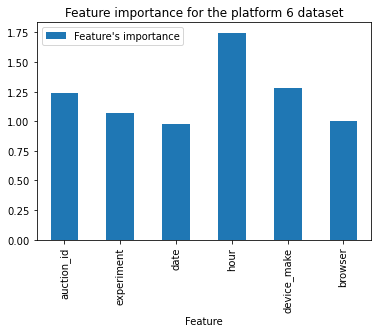

In [131]:
# Ploting the feature importance graph for the platform 6 data

X_pl_6 = pl_6_data_clean.iloc[:,:6]
y_pl_6 = pl_6_data_clean.iloc[:,-1]
x_main,x_test,y_main,y_test = train_test_split(X_pl_6,y_pl_6,test_size=0.1)
x_train,x_valid,y_train,y_valid = train_test_split(x_main,y_main,test_size=0.22)
model_pl_6 = LogisticRegression()
model_pl_6.fit(x_train,y_train)
model_pl_6.score(x_valid,y_valid)
coefitients_pl_6 = model_pl_6.coef_
feature_importance_pl_6_df = pd.DataFrame(features,columns=['Feature'])
feature_importance_pl_6_df['Feature\'s importance'] = pow(math.e,np.array(coefitients_pl_6[0]))
feature_importance_pl_6_df.plot.bar(x='Feature', y="Feature's importance", rot=90)
plt.title('Feature importance for the platform 6 dataset')